In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Parametri target
m_true = 2
b_true = 1

seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Dati di validazione fissi
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

In [ ]:
# Funzione di training che restituisce i plot
def train_and_plot(ntrain, nepochs, sigma):
    x_train = np.random.uniform(-1, 1, ntrain)#x di training
    y_target = m_true * x_valid + b_true #funzione target
    y_train = np.random.normal(m_true * x_train + b_true, sigma)#y di training
    y_valid = np.random.normal(m_true * x_valid + b_true, sigma)#y di validazione

    #preparo la rete neurale
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse')

    #addestramento
    history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=nepochs,
                        shuffle=True,
                        validation_data=(x_valid, y_valid),
                        verbose=0)

    #pesi e bias dell'ultimo neurone
    weights, bias = model.get_weights()
    m_fit = weights[0][0]
    b_fit = bias[0]

    #predizione della rete sui dati di validazione
    y_pred = model.predict(x_valid)

    # Primo grafico: funzione target, validation data e funzione predetta
    fig1 = plt.figure()
    plt.plot(x_valid, y_target, label='Target (m=2, b=1)')
    plt.scatter(x_valid, y_valid, color='r', label='Validation data', s=10)
    plt.plot(x_valid, y_pred, label=f'Predicted (m={m_fit:.2f}, b={b_fit:.2f})')
    plt.legend()
    plt.grid(True)
    plt.title(f"ntrain={ntrain}, sigma={sigma}, epochs={nepochs}")

    # Secondo grafico: loss su training e validation data
    fig2 = plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss - ntrain={ntrain}, sigma={sigma}, epochs={nepochs}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)

    plt.close(fig1)
    plt.close(fig2)

    return fig1, fig2

In [ ]:
# Utility per mostrare 3 grafici in riga
def show_grid(figs, title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))#inserisce 3 figure in una griglia 1X3
    fig.suptitle(title, fontsize=16)#titolo globale
    for i, subfig in enumerate(figs):
        tmp = subfig.axes[0]
        canvas = tmp.get_figure().canvas# "superficie" su cui disegnare
        canvas.draw()#disegno
        axs[i].imshow(np.array(canvas.buffer_rgba()))#in pratica trasforma il grafico originale in un subplot così da inseriro nella griglia
        axs[i].axis('off')#disabilita gli assi dei subplot perchè mostra una griglia globale di diverse immagini
    plt.tight_layout()
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


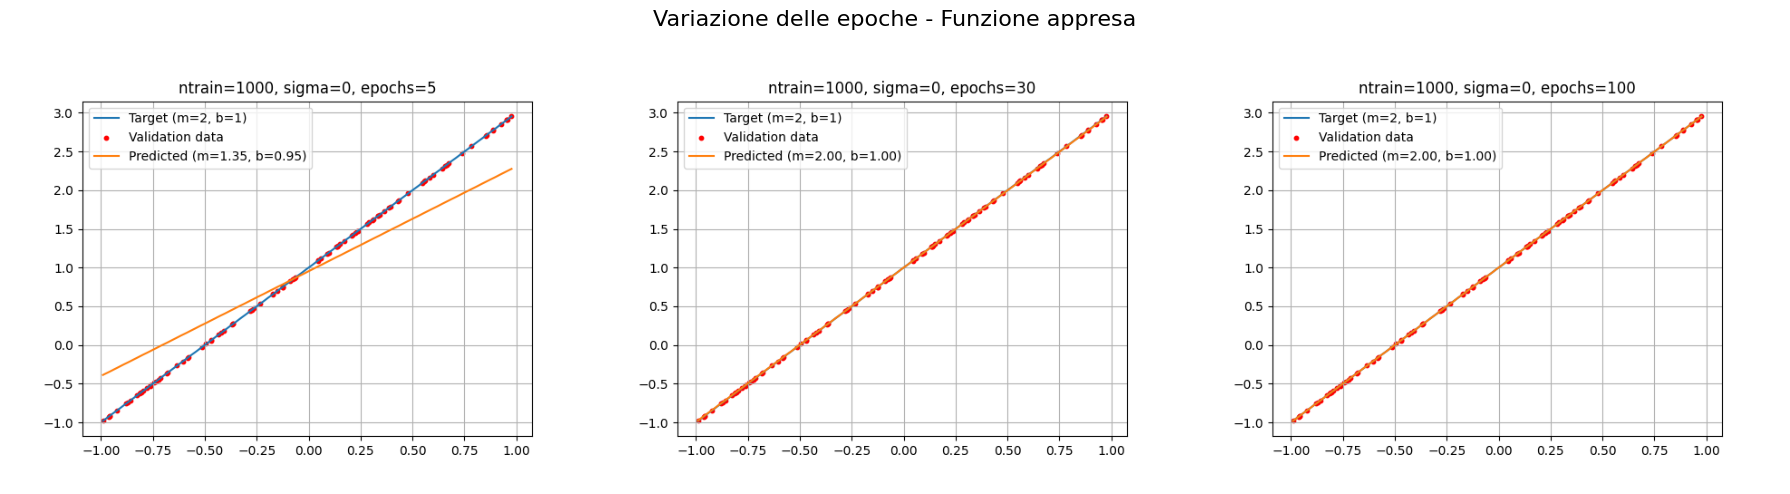

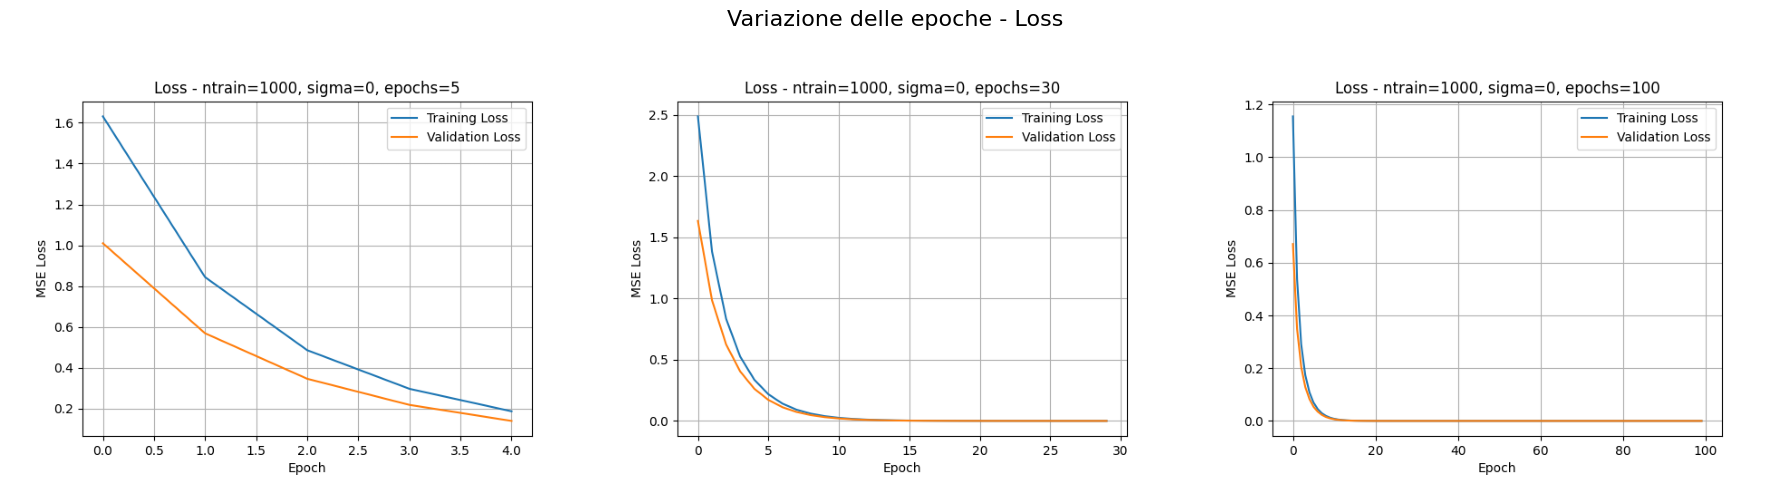

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


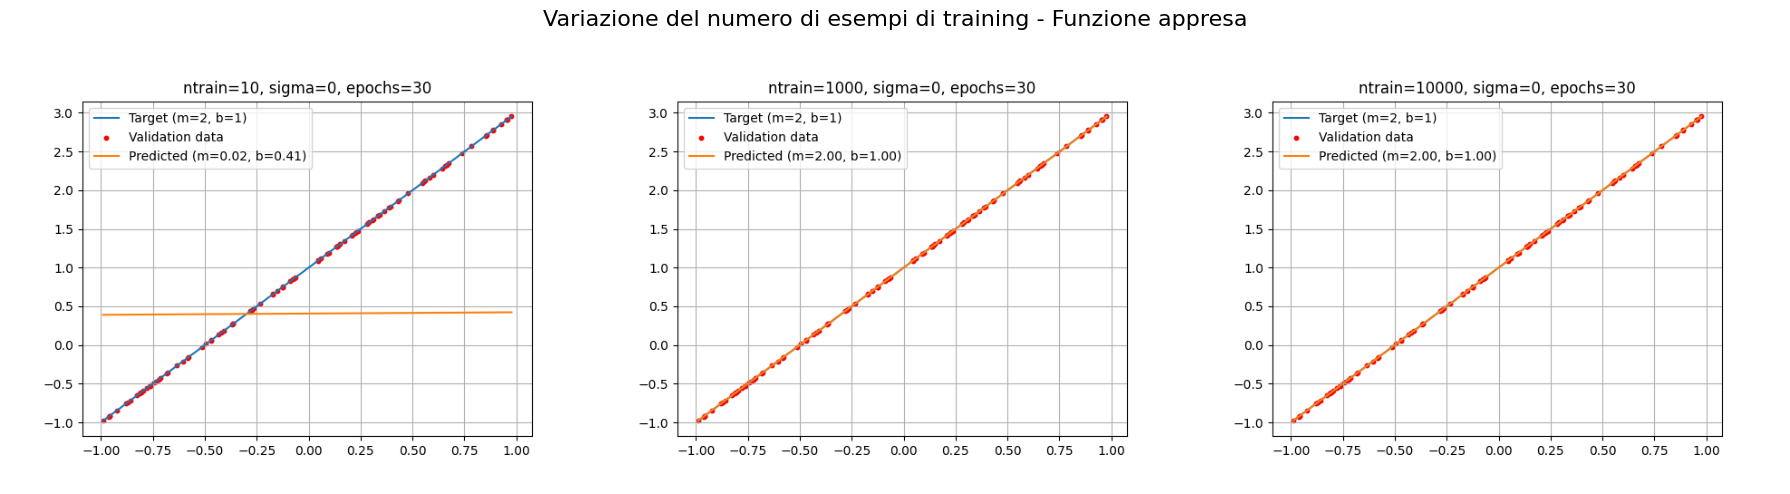

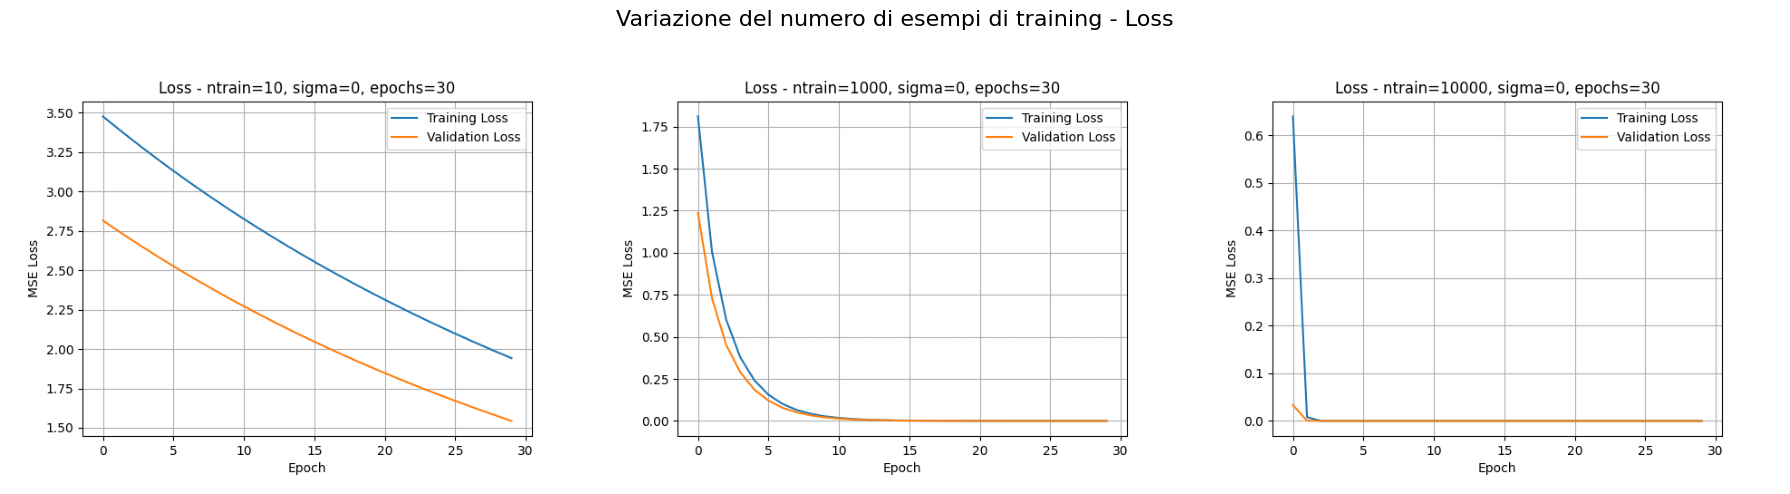

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


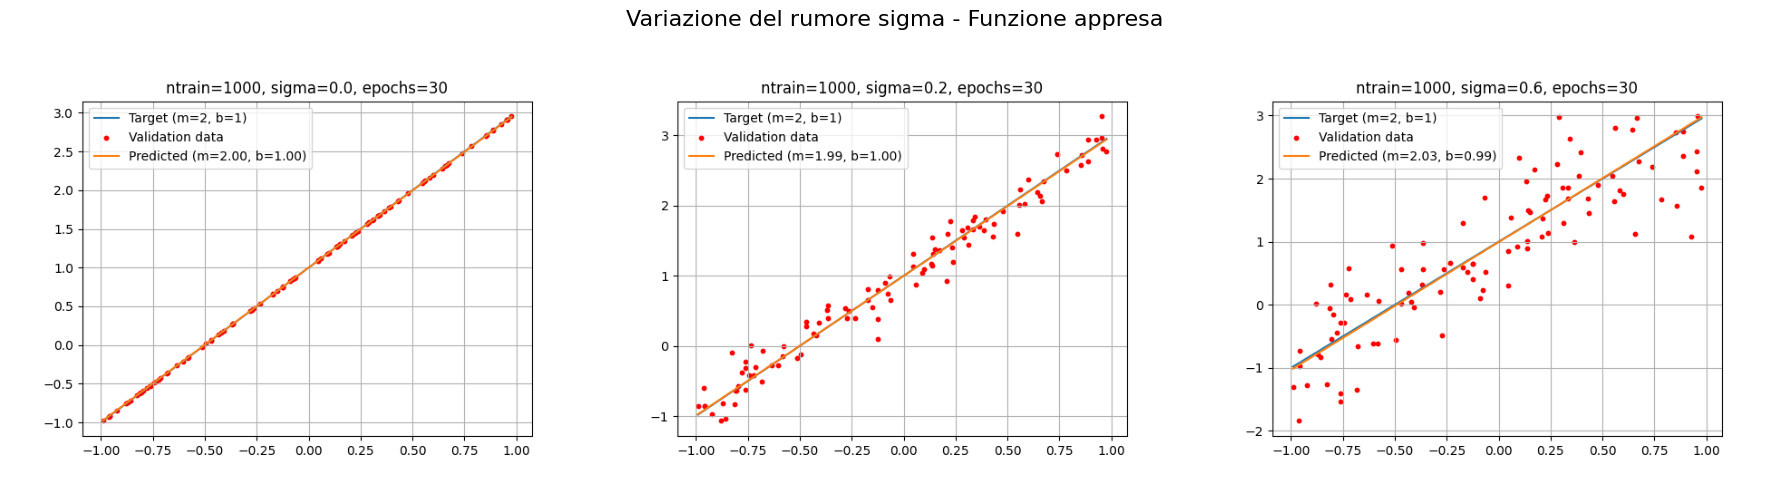

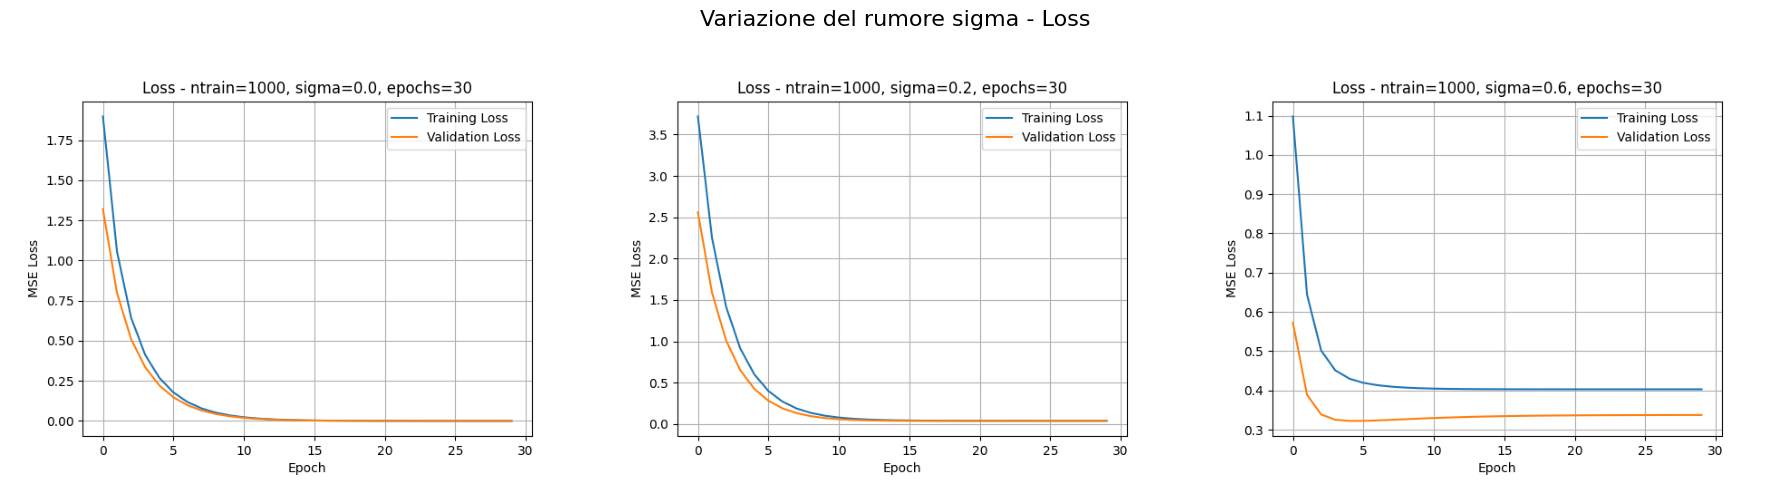

In [ ]:
# ciclo 1: vario epochs
fit_figs, loss_figs = [], []#preparo gli oggetti da caricare in showgrid
for nepochs in [5, 30, 100]:
    fig_fit, fig_loss = train_and_plot(ntrain=1000, nepochs=nepochs, sigma=0)# inizializzo con le figure ottenute con la rete neurale
    #inserisco le figure negli oggetti appositi
    fit_figs.append(fig_fit)
    loss_figs.append(fig_loss)

#creo le griglie 3X1
show_grid(fit_figs, "Variazione delle epoche - Funzione appresa")
show_grid(loss_figs, "Variazione delle epoche - Loss")

#ripeto per il secondo ciclo
# ciclo 2: vario ntrain
fit_figs, loss_figs = [], []
for ntrain in [10, 1000, 10000]:
    fig_fit, fig_loss = train_and_plot(ntrain=ntrain, nepochs=30, sigma=0)
    fit_figs.append(fig_fit)
    loss_figs.append(fig_loss)

show_grid(fit_figs, "Variazione del numero di esempi di training - Funzione appresa")
show_grid(loss_figs, "Variazione del numero di esempi di training - Loss")

#ripeto per il terzo ciclo
# Esperimento 3: vario sigma
fit_figs, loss_figs = [], []
for sigma in [0.0, 0.2, 0.6]:
    fig_fit, fig_loss = train_and_plot(ntrain=1000, nepochs=30, sigma=sigma)
    fit_figs.append(fig_fit)
    loss_figs.append(fig_loss)

show_grid(fit_figs, "Variazione del rumore sigma - Funzione appresa")
show_grid(loss_figs, "Variazione del rumore sigma - Loss")

# Esercizio 11.1

### Variazione delle epoche
Con poche epoche la rete neurale fatica a predire modelli soddisfacenti e accurati: non ha eseguito abbastanza cicli di addestramento. Se il numero di epoche fosse molto grande, ci sarebbe il rischio di overfitting su $N_{train}$ per l'eccessivo addestramento su quei dati e dunque una loss minima per i dati di addestramento mentre una loss più consistente per i dati di validazione. In questo caso il fenomeno non si osserva perchè la funzione è lineare dunque la rete neurale è molto semplice.

### Variazione di $N_{train}$
Con pochi $N_{train}$ la rete neurale fatica a predire modelli accurati: anche in questo caso l'addestramento non è stato adeguato. Troppi pochi dati compromettono la capacità dell'algoritmo di fare previsioni globali. All'aumentare di $N_{train}$ invece si rischia l'overfitting, ma, come per il numero di epoche, questo fenomeno non si osserva perchè la funzione è semplice.

### Variazione di $\sigma$
Variando sigma i dati di validazione e addestramento sono più "sporcati". Ciò compromette una corretta predizione della rete neurale e aumenta notevolmente la loss sia sui dati di addestramento sia sui dati di validazione. Con troppo elevato diventerebbe impossibile la predizione della funzione target perchè si tratterebbe di fittare dei dati sparsi casualmente con una funzione lineare.
